## Feature Seleciton Framework

Feature selection is a critical step in building effective machine learning models. It involves choosing a subset of relevant features from your data to improve model performance and reduce complexity. Here are some common feature selection techniques:

### 1. **Filter Methods**
   - **Statistical Tests**: Use statistical measures to score the importance of features.
     - **Chi-Square Test**: Tests independence between feature and target variable.
     - **ANOVA (Analysis of Variance)**: Measures the difference between group means.
     - **Mutual Information**: Measures the dependency between features and target.

   - **Correlation Coefficient**: Measures the correlation between each feature and the target variable. Features with high correlation are selected.

### 2. **Wrapper Methods**
   - **Forward Selection**: Starts with no features and adds one feature at a time that improves model performance until no further improvement.
   - **Backward Elimination**: Starts with all features and removes the least significant feature iteratively until the performance starts to degrade.
   - **Recursive Feature Elimination (RFE)**: Fits the model, ranks features by importance, and eliminates the least important features iteratively.

### 3. **Embedded Methods**
   - **Lasso Regression (L1 Regularization)**: Adds a penalty to the regression model based on the absolute values of feature coefficients, effectively shrinking some coefficients to zero.
   - **Ridge Regression (L2 Regularization)**: Adds a penalty based on the square of coefficients, which can shrink coefficients but typically does not set them to zero.
   - **Elastic Net**: Combines L1 and L2 regularization, allowing for both shrinkage and feature selection.

### 4. **Dimensionality Reduction Techniques**
   - **Principal Component Analysis (PCA)**: Transforms features into a set of linearly uncorrelated components ranked by the amount of variance they explain.
   - **Linear Discriminant Analysis (LDA)**: Projects features onto a lower-dimensional space while maximizing class separability.
   - **t-Distributed Stochastic Neighbor Embedding (t-SNE)**: Useful for visualizing high-dimensional data in lower dimensions, though less commonly used for feature selection.

### 5. **Tree-Based Methods**
   - **Feature Importance from Decision Trees**: Models like Random Forests and Gradient Boosting Trees provide feature importance scores based on how frequently a feature is used to split the data.
   - **Gradient Boosting Machines (GBMs)**: Often provide feature importance directly, which can be used to select the most influential features.

### 6. **Embedded Methods with Specific Algorithms**
   - **Decision Tree**: Automatically ranks features based on the importance of each feature for splitting.
   - **XGBoost**: Provides feature importance scores as part of the model output.

### 7. **Hybrid Methods**
   - **Combining Multiple Techniques**: For example, using a filter method to pre-select a subset of features, followed by a wrapper or embedded method for further refinement.

### Practical Considerations
- **Cross-Validation**: Ensure that feature selection methods are validated using cross-validation to avoid overfitting.
- **Domain Knowledge**: Incorporating domain expertise can guide feature selection and improve model interpretability.

Each technique has its own strengths and is suited to different types of data and problems, so it’s often useful to experiment with multiple methods to find the most effective approach for your specific situation.

In [1]:
# data manulplation
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# statstical testing
from scipy import stats

# train test split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

# metrcs
from sklearn.metrics import f1_score

# general
import os
from typing import List
import warnings
warnings.filterwarnings('ignore')

### Preparing Data

In [2]:
# loading data
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Forward Feature Selection

In [4]:
import sklearn
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [5]:
print("Sklearn: ", sklearn.__version__)

Sklearn:  1.3.2


In [6]:
model = RandomForestClassifier()

In [7]:
cv = StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=0) # to reproduce the same score

In [8]:
selection_obj = SequentialFeatureSelector(
    estimator=model, # try on this model
    n_features_to_select="auto", # select automatically,
    tol = None, # score threshould
    direction="forward", #direction of feature selection
    scoring="f1", # evaluation metric
    cv=cv, #cross validation method
    n_jobs=-1, # use all cores
)

In [9]:
features = data.feature_names 
X = df[features].values
y = df[["target"]].iloc[:, 0].values

In [10]:
selection_obj.fit(X, y)

SequentialFeatureSelector(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                          estimator=RandomForestClassifier(), n_jobs=-1,
                          scoring='f1')

#### Get Selected Fetaures

In [11]:
selected_features = selection_obj.get_feature_names_out(features)

In [12]:
selected_features

array(['mean radius', 'mean texture', 'mean smoothness',
       'mean compactness', 'mean concave points',
       'mean fractal dimension', 'compactness error',
       'concave points error', 'symmetry error', 'worst radius',
       'worst texture', 'worst area', 'worst smoothness',
       'worst concavity', 'worst fractal dimension'], dtype=object)

#### Get Selected Fetaures Index

In [13]:
selection_obj.get_support(indices=True)

array([ 0,  1,  4,  5,  7,  9, 15, 17, 18, 20, 21, 23, 24, 26, 29])

In [14]:
"Selected Feature Count: ",len(selected_features), "Features Passed: ",len(features)

('Selected Feature Count: ', 15, 'Features Passed: ', 30)

In [15]:
s = cross_val_score(
    estimator=model,
    X=X[:, selection_obj.get_support(indices=True)],
    y=y,
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    
)

In [16]:
f"Mean: ", np.mean(s), "-", "Std: ", np.std(s)

('Mean: ', 0.9764083371686437, '-', 'Std: ', 0.011411189797189992)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Train Score: {f1_score(y_train, y_train_pred)}")
print(f"Test Score: {f1_score(y_test, y_test_pred)}")

Train Score: 1.0
Test Score: 0.9586776859504132


### Backward Feature Elimination

In [19]:
from sklearn.feature_selection import RFECV

In [21]:
rf_eliminate_cv = RFECV(
    estimator=model,          # try on this model
    step=1,                   # num of features to eliminate
    min_features_to_select=1, # min feature to select
    scoring="f1",             # evaluation metric
    cv=5,                    # cross validation method
    verbose=0,                # print no logs 
    n_jobs=-1,                # use all cores
)

In [22]:
X.shape, y.shape

((569, 30), (569,))

In [23]:
rf_eliminate_cv.fit(X, y)

RFECV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1, scoring='f1')

In [24]:
len(features)

30

#### Get Selected Fetaures

In [25]:
selected_features = rf_eliminate_cv.get_feature_names_out(features)

In [26]:
selected_features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean concavity', 'mean concave points', 'radius error',
       'perimeter error', 'area error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry',
       'worst fractal dimension'], dtype=object)

#### Get Selected Fetaures Index

In [27]:
rf_eliminate_cv.get_support(indices=True)

array([ 0,  1,  2,  3,  6,  7, 10, 12, 13, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])

In [28]:
"Selected Feature Count: ",len(selected_features), "Features Passed: ",len(features)

('Selected Feature Count: ', 20, 'Features Passed: ', 30)

In [29]:
s = cross_val_score(
    estimator=model,
    X=X[:,rf_eliminate_cv.get_support(indices=True)],
    y=y,
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    
)

In [30]:
f"Mean: ", np.mean(s), "-", "Std: ", np.std(s)

('Mean: ', 0.9724241575305406, '-', 'Std: ', 0.015791139076775363)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Train Score: {f1_score(y_train, y_train_pred)}")
print(f"Test Score: {f1_score(y_test, y_test_pred)}")

Train Score: 1.0
Test Score: 0.970954356846473


### Creating Function Out of it

In [56]:
# linear model
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
# Byes model
from sklearn.naive_bayes import GaussianNB
# support vector machine
from sklearn.svm import SVC
# distance based model
from sklearn.neighbors import KNeighborsClassifier
# tree based
from sklearn.tree import DecisionTreeClassifier
# bagging special case
from sklearn.ensemble import RandomForestClassifier
# ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

In [75]:
class Wrapper_Methods:

    def __init__(self, df:pd.DataFrame, features:List[str], target:List[str], scoring:str, cv:int, seed:int, shuffle:bool):
        self.df = df
        self.features = features
        self.target = target
        self.scoring = scoring
        self.cv = cv
        self.seed = seed
        self.shuffle = shuffle
        self.X, self.y = self.load_data()
        self.model_tags = ["LR", "RDG", "NB", "SVM", "KNN", "DT", "RF", "SGD", "GB", "AB", "ETC", "XGB", "XGRFB", "LGB", "CB"]

    def load_data(self):
        X = self.df[self.features].values
        y = self.df[self.target].iloc[:,0].values
        return X, y
    
    def get_model(self, model_tag):
        
        if model_tag == "LR":
            return {"LR": ("Logistic Regression", LogisticRegression(solver="liblinear" ,max_iter=2000))}
        
        if model_tag == "RDG":
            return {"RDG": {"Ridge Classifier", RidgeClassifier()}}
        
        if model_tag == "SGD":
            return {"SGD": ("Stocastic Gradient", SGDClassifier())}
        
        if model_tag == "NB":        
            return {"NB": ("Naive Bayes", GaussianNB())}

        if model_tag == "SVM":        
            return {"SVM": ("Support Vector", SVC(kernel='linear'))} # this kernel works with RFE

        if model_tag == "KNN":         
            return {"KNN": ("K-Neighbors", KNeighborsClassifier(n_neighbors=2))}

        if model_tag == "DT":        
            return {"DT": ("Decision Tree", DecisionTreeClassifier())}

        if model_tag == "RF":        
            return {"RF": ("Random Forest", RandomForestClassifier())}

        if model_tag == "GB":        
            return {"GB": ("Gradient Boosting", GradientBoostingClassifier())}

        if model_tag == "AB":        
            return {"AB": ("Ada Boosting", AdaBoostClassifier())}

        if model_tag == "ETC":        
            return {"ETC": ("Extra Tres Boosting", ExtraTreesClassifier())}

        if model_tag == "XGB":        
            return {"XGB": ("Extra Gradient Boosting", XGBClassifier())}

        if model_tag == "XGRFB":        
            return {"XGRFB": ("Extra Random Forest Boosting", XGBRFClassifier())}

        if model_tag == "LGB":        
            return {"LGB": ("Light Boosting",LGBMClassifier(learning_rate=0.01, n_estimators=1000))}

        if model_tag == "CB":        
            return {"CB": ("Cat Boosting", CatBoostClassifier(verbose=0))}


    def evaluate_model(self, model, n_features:List[int]):
        # define the model evaluation procedure
        cv = StratifiedKFold(n_splits=self.cv, random_state=self.seed, shuffle=self.shuffle)
        # evaluate the model: n-jobs=-1 [uses all cores]
        scores = cross_val_score(model, self.X[:,n_features], self.y, scoring=self.scoring, cv=cv, n_jobs=-1)

        return scores
    
    def get_custome_scores(self, scores: List[float]):
        mean_score = np.mean(scores)
        std_score = np.std(scores)

        return mean_score, std_score
    
    def box_plot(self, names, results):
        """ 
        plots box plot for each feature combination
        """
        # plot model performance for comparison
        plt.boxplot(results, labels=names, showmeans=True)
        plt.xlabel("Models")
        plt.ylabel(f"Score: {self.scoring}")
        plt.title(f"Performance of Models")
        plt.grid()
        plt.show()

    def recursive_feature_selection(self, model_tags:List[str], print_status:bool, direction: str = "forward"):
        """ 
        Objective: this works on subset of features and there influence over evaluation metric, that will get us to max score
        by forwardly or backwardly eliminating the features from superset

        Remainder: this technique works with parametric and non-parametric models, does not rely on feature importance or 
        models coefficients to determin the feature selection

        Parameters:

        model_tags (List[str]): abbrivateions of model 

        print_status (bool): print model training status

        direction (str): feature selection direction , default is "forward"
                            "forward"  : subset -> superset
                            "backward" : superset -> subset

        Returns:

        model_report (dict): models performance on each subset of features
        """
        # run model evaluation for all sub set of features
        model_report = dict()
        features_list = []
        mean_scores = []
        std_scores = []
        model_names = []
        all_scores = []

        # testing all features
        for model_tag in model_tags:

            # get model 
            model_name, model = self.get_model(model_tag)[model_tag]
            print('='*15,model_name,'='*15)
            # forward features selection
            selection_obj = SequentialFeatureSelector(
                estimator=model,             # try on this model
                n_features_to_select="auto", # select automatically,
                tol = None,                  # score threshould
                direction=direction,         # direction of feature selection
                scoring=self.scoring,        # evaluation metric
                cv=self.cv,                  # cross validation method
                n_jobs=-1,                   # use all cores
            )
            selection_obj.fit(X, y)

            # evaluating for score on selected features
            s = self.evaluate_model( model, selection_obj.get_support(indices=True))

            # collecting all scores
            all_scores.append(s)
            # mean scores
            mean, std = self.get_custome_scores(s)
            
            # print those scores
            if print_status:
                print('='*15,model_name,'='*15)
                msg = f"{len(selected_features)} : Mean: {mean} Std: {std}\n"
                print(msg)
            
            features_list.append(selection_obj.get_feature_names_out(features))
            mean_scores.append(mean)
            std_scores.append(std)
            model_names.append(model_name)
            

        # collecting all scores
        model_report["model_name"] = model_names
        model_report[f"mean_{self.scoring}"] = mean_scores
        model_report[f"std_{self.scoring}"] = std_scores
        model_report["selected_features"] = features_list
        model_report["cv_scores"] = all_scores

        # plotting results
        self.box_plot(model_tags, all_scores)

        return model_report

    def backward_feature_elimination(self, model_tags:List[str], print_status:bool):
        """ 
        Objective: this function provieds subset of features by starting with all features at once eliminates one 
        feature at a time if score deteriorates, based of feature importance or coeefiecient associated with the feature

        Remainder: this technique works ONLY with parametric models, cause it highly dependent on `feature importance`
        and `co-efficient` associated with features as well of evaluation score

        Parameters:

        model_tags (List[str]): abbrivateions of parametric model

        print_status (bool): print model training status

        Returns:

        model_report (dict): models performance on each subset of features
        """

        # run model evaluation for all sub set of features
        model_report = dict()
        features_list = []
        mean_scores = []
        std_scores = []
        model_names = []
        all_scores = []

        # testing all features
        for model_tag in model_tags:

            # get model 
            model_name, model = self.get_model(model_tag)[model_tag]
            print('='*15,model_name,'='*15)
            rf_eliminate_cv = RFECV(
                estimator=model,
                step=1,
                cv=self.cv,
                scoring=self.scoring,
                min_features_to_select=1,
                n_jobs=-1,
            )
            rf_eliminate_cv.fit(X, y)

            # evaluating for score on selected features
            s = self.evaluate_model(model, rf_eliminate_cv.get_support(indices=True))

            # collecting all scores
            all_scores.append(s)
            # mean scores
            mean, std = self.get_custome_scores(s)
            
            # print those scores
            if print_status:
                msg = f"{len(selected_features)} : Mean: {mean} Std: {std}\n"
                print(msg)
            
            features_list.append(selection_obj.get_feature_names_out(features))
            mean_scores.append(mean)
            std_scores.append(std)
            model_names.append(model_name)
            

        # collecting all scores
        model_report["model_name"] = model_names
        model_report[f"mean_{self.scoring}"] = mean_scores
        model_report[f"std_{self.scoring}"] = std_scores
        model_report["selected_features"] = features_list
        model_report["cv_scores"] = all_scores

        # plotting results
        self.box_plot(model_tags, all_scores)

        return model_report

In [63]:
# parameters
DATA = df.copy()
TARGET_COL = ["target"]
FEATURES = [i for i in df.columns if i not in TARGET_COL]
SCORING = "f1"
CV = 5
SEED = 0
SHUFFLE = True

In [64]:
wrapper_obj = Wrapper_Methods(
    DATA,
    FEATURES,
    TARGET_COL,
    SCORING,
    CV,
    SEED,
    SHUFFLE
)

In [50]:
# models work with forward selection approach
model_tags = ["LR", "NB", "SVM", "KNN", "DT", "RF", "GB", "AB", "ETC", "XGB", "XGRFB","CB"]

#### Forward Feature Selection

=============== Logistic Regression ===============
15 : Mean: 0.9614654648901224 Std: 0.017316833023179858

=============== Naive Bayes ===============
15 : Mean: 0.9778861521316251 Std: 0.00801426637200888

=============== Support Vector ===============
15 : Mean: 0.9555953889301645 Std: 0.016862996827695802

=============== K-Neighbors ===============
15 : Mean: 0.9443231466656273 Std: 0.01329658737884411

=============== Decision Tree ===============
15 : Mean: 0.9512403917728539 Std: 0.014622413108253471

=============== Random Forest ===============
15 : Mean: 0.9736857961482304 Std: 0.013313112244945656

=============== Gradient Boosting ===============
15 : Mean: 0.9791747656926704 Std: 0.011608549367401997

=============== Ada Boosting ===============
15 : Mean: 0.9696476654683341 Std: 0.014234317697886738

=============== Extra Tres Boosting ===============
15 : Mean: 0.9752058852114072 Std: 0.006853943706277657

=============== Extra Gradient Boosting ===============
15 : Me

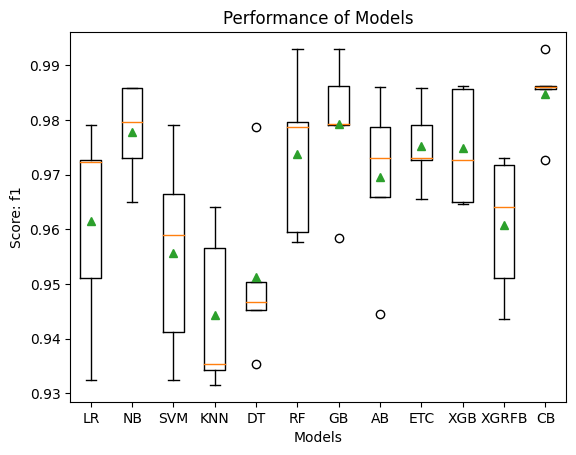

In [195]:
model_report = wrapper_obj.forward_feature_selection(model_tags, True)

In [74]:
pd.DataFrame(model_report).sort_values(by="mean_f1", ascending=False)

,model_name,mean_f1,std_f1,selected_features,cv_scores
8,Extra Gradient Boosting,0.980797,0.008813,"[mean radius, mean texture, mean smoothness, m...","[0.9793103448275862, 0.9929078014184397, 0.986..."
10,Cat Boosting,0.979248,0.004404,"[mean radius, mean texture, mean smoothness, m...","[0.9722222222222222, 0.9787234042553192, 0.979..."
5,Extra Tres Boosting,0.976374,0.007067,"[mean radius, mean texture, mean smoothness, m...","[0.965034965034965, 0.9787234042553192, 0.9795..."
4,Random Forest,0.973559,0.016024,"[mean radius, mean texture, mean smoothness, m...","[0.951048951048951, 0.9787234042553192, 0.9861..."
6,Gradient Boosting,0.973482,0.017465,"[mean radius, mean texture, mean smoothness, m...","[0.9436619718309859, 0.9929078014184397, 0.986..."
0,Logistic Regression,0.965426,0.011978,"[mean radius, mean texture, mean smoothness, m...","[0.9577464788732394, 0.9857142857142858, 0.952..."
7,Support Vector,0.965238,0.022085,"[mean radius, mean texture, mean smoothness, m...","[0.9295774647887324, 0.9787234042553192, 0.952..."
1,Ridge Classifier,0.964612,0.007315,"[mean radius, mean texture, mean smoothness, m...","[0.953020134228188, 0.971830985915493, 0.96000..."
9,Extra Random Forest Boosting,0.962461,0.016162,"[mean radius, mean texture, mean smoothness, m...","[0.9305555555555556, 0.9714285714285714, 0.972..."
3,Decision Tree,0.944109,0.009944,"[mean radius, mean texture, mean smoothness, m...","[0.9343065693430657, 0.9571428571428571, 0.952..."


#### Backward Feature Elimination

In [69]:
# non-parametric mdoels tags list

model_tags = ["LR",  # logistic regression 
              "RDG", # Ridge Classifier
              "SGD", # stocastic gradient descent classifier
              "DT" , # decision tree
              "RF",  # random forest
              "ETC", # extra tree classifier
              "GB",  # gradient boosting classifier
              "SVM", # support vector classifier,
              "XGB", # Xtream gradient boosting
              "XGRFB", # Xtream random forest gradient boosting
              "CB"   # cat boost
              ]

In [76]:
model_tags = ["LR", "RDG", "SGD", "DT" , "RF", "ETC", "GB", "SVM", "XGB", "XGRFB", "CB" ]

=============== Logistic Regression ===============
20 : Mean: 0.965426432468686 Std: 0.011978199355566793

=============== Ridge Classifier ===============
20 : Mean: 0.9646119473847452 Std: 0.007315190993789965

=============== Stocastic Gradient ===============
20 : Mean: 0.9241070199161868 Std: 0.012698925608671785

=============== Decision Tree ===============
20 : Mean: 0.9441085415267997 Std: 0.009943950352054916

=============== Random Forest ===============
20 : Mean: 0.9735589138022831 Std: 0.016024475737800428

=============== Extra Tres Boosting ===============
20 : Mean: 0.9763736877417504 Std: 0.007066970765095714

=============== Gradient Boosting ===============
20 : Mean: 0.9734818727025457 Std: 0.01746453407814744

=============== Support Vector ===============
20 : Mean: 0.9652384725138943 Std: 0.02208479510257482

=============== Extra Gradient Boosting ===============
20 : Mean: 0.9807966896300305 Std: 0.008813315572744092

=============== Extra Random Forest Boost

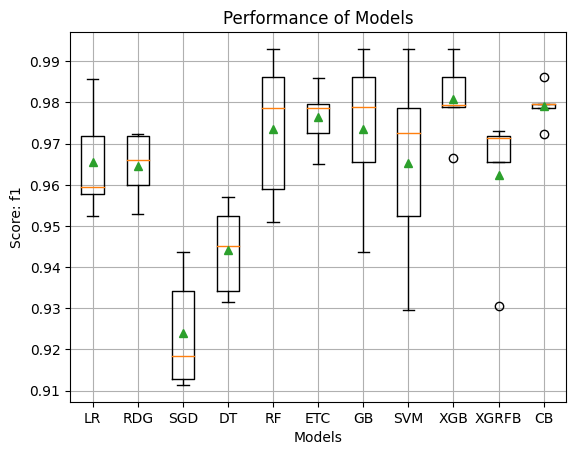

In [73]:
model_report = wrapper_obj.backward_feature_elimination(model_tags, True)

In [ ]:
pd.DataFrame(model_report).sort_values(by="mean_f1", ascending=False)

##### Testing: Light GBM

In [72]:
model_report = wrapper_obj.backward_feature_elimination(["LGB"], True)

=============== Light Boosting ===============
[LightGBM] [Info] Number of positive: 286, number of negative: 170
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Number of positive: 285, number of negative: 170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_col_wise=true` to remove the overhead.[LightGBM] [Info] Total Bins 4542

[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4572
[LightGBM] [Info] Number of data points in the train set: 456, number of used features: 30
[LightGBM] [Info] Number of data points in the train set: 455, number of 

KeyboardInterrupt: 

**Conclusion:**

- try to use this seperately, it' kind of heavy lifter